# Agenda
- ### Python Basics
- ### Data Wrangling & Understanding with Pandas
- ### Data Visualizing with Matplotlib
- ### Model Building with Scikit-Learn

# At This Point:

* ### Anaconda Installed
* ### Able to open Jupyter Notebook
* ### Able to import the follwing libraries:
  - #### numpy
  - #### pandas
  - #### matplotlib
  - #### sklearn

# Python Basics

### There are many ways to run Python code.
Command Line Interpreter 
    - Usually installed as /usr/local/bin/python

Command Line File Execution 
    - Basic: SublimeText2, Atom, Notepad ++
    - Advanced: Vim, Emacs 

IDE (Integrated Development Environments)
    - Canopy
    - PyCharm
    - Spyder

Jupyter Notebook (formerly iPython Notebook)

### What is Jupyter Notebook?
It is an interactive computational environment, in which you can combine code execution, rich text, mathematics, plots and rich media.

### What are the key Python libraries for data science?

1.  **Pandas** – R-like dataframes, data cleaning, data munging, data exploration

2.  **Matplotlib** – plotting environment

3.  **NumPy** – fast arrays/matrices and vector operations

4. **Scikit-learn** – maching learning, data mining


### Import Python Libraries

In [2]:
## import an entire library
import matplotlib

## import an entire library with an alias
import numpy as np
import pandas as pd

## import a specific module from a library (with an alias)
from sklearn import datasets 
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

## import even more specific modules
from sklearn.datasets import make_blobs
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LogisticRegression as LogReg

# Data Wrangling with Pandas

### 1. The Basics

**Pandas DataFrame:**
Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The primary pandas data structure.

In [3]:
data1 = dict()
data1 = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]
       }

df1 = pd.DataFrame(data1, index = ['a', 'b', 'c', 'd', 'e'])

In [5]:
df1.head()

,pop,state,year
a,1.5,Ohio,2000
b,1.7,Ohio,2001
c,3.6,Ohio,2002
d,2.4,Nevada,2001
e,2.9,Nevada,2002


**Basic CRUD Operations with DataFrames**

##### CREATE

In [9]:
## scalar val
df1['new_var'] = False

## array-like
df1['new_var'] = range(len(df1))

## reference to another column
df1['new_var'] = df1['pop'] * 20
df1

,pop,state,year,new_var
a,1.5,Ohio,2000,30.0
b,1.7,Ohio,2001,34.0
c,3.6,Ohio,2002,72.0
d,2.4,Nevada,2001,48.0
e,2.9,Nevada,2002,58.0


When assigning lists or arrays to a column, the value’s length must match the length of the DataFrame. If you assign a Series, it will be instead conformed exactly to the DataFrame’s index, inserting missing values in any holes:

##### READ

In [23]:
## read as dict-like object\
# df1['new_var']

## read as attribute
df1.pop

## read multiple columns
df1[['state', 'new_var']]

a    30.0
b    34.0
c    72.0
d    48.0
e    58.0
Name: new_var, dtype: float64

In [26]:
df1

,pop,state,year,new_var
a,1.5,Ohio,2000,30.0
b,1.7,Ohio,2001,34.0
c,3.6,Ohio,2002,72.0
d,2.4,Nevada,2001,48.0
e,2.9,Nevada,2002,58.0


In [39]:
## reading rows
df1.loc['a', 'year']
# df1.ix[3, 2]
# df1.iloc[0]

2000

##### UPDATE

In [45]:
df1.state == 'Ohio'

a     True
b     True
c     True
d    False
e    False
Name: state, dtype: bool

In [46]:
## Same as create (for a column that already exists)
df1['new_var'] = True
df1.new_var = range(5)[::-1]
df1['state_is_ohio'] = df1.state == 'Ohio'

df1

,pop,state,year,new_var,state_is_ohio
a,1.5,Ohio,2000,4,True
b,1.7,Ohio,2001,3,True
c,3.6,Ohio,2002,2,True
d,2.4,Nevada,2001,1,False
e,2.9,Nevada,2002,0,False


##### DELETE

In [52]:
## Drop a row
df1.drop('d', axis = 0)

## Drop a column
df1.drop('new_var', axis = 1)

## Inplace (irreversible live-changes, be very sure, do not do this on accident!)
df1.drop('new_var', axis = 1, inplace = True)

In [55]:
df2 = df1.drop('state_is_ohio', axis = 1)

In [56]:
df2

,pop,state,year
a,1.5,Ohio,2000
b,1.7,Ohio,2001
c,3.6,Ohio,2002
d,2.4,Nevada,2001
e,2.9,Nevada,2002


In [54]:
df1

,pop,state,year,state_is_ohio
a,1.5,Ohio,2000,True
b,1.7,Ohio,2001,True
c,3.6,Ohio,2002,True
d,2.4,Nevada,2001,False
e,2.9,Nevada,2002,False


### 1. The Basics - Exercises

In [62]:
## build a new dataframe (df2)

df2 = pd.DataFrame(data1)

In [63]:
## print the entire DF

df2

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


In [ ]:
## print just the column `[var_name]`



In [64]:
## print just the third row (use a few different methods)

df2.iloc[2]
df2.loc['c']


KeyError: 'the label [c] is not in the [index]'

In [67]:
## create a new column `new_var` with incrementing values
print range(5)
print np.arange(5)



[0, 1, 2, 3, 4]
[0 1 2 3 4]


In [72]:
## delete a column

df2.drop('year', axis = 1)

,pop,state
0,1.5,Ohio
1,1.7,Ohio
2,3.6,Ohio
3,2.4,Nevada
4,2.9,Nevada


In [ ]:
## delete a row

### 2. Select and Filter

In [73]:
df3 = pd.DataFrame(np.arange(16).reshape((4, 4)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns=['a', 'b', 'c', 'd'])

In [74]:
df3

,a,b,c,d
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [79]:
df3['a']

df3[['a',]]

,a
Ohio,0
Colorado,4
Utah,8
New York,12


Quick Question: What's the difference between: df3['a'] and df3[['a']]

##### Select A Range of Rows

In [81]:
df3

,a,b,c,d
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [82]:
df3[0:3]

,a,b,c,d
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11


Things to remember about slicing dataframes:
* python is zero-indexed
* start number is inclusive
* end number is exclusive

##### Select Using Index Names - .loc

In [83]:
df3.loc[['Ohio', 'Utah'], ['b','d']]

,b,d
Ohio,1,3
Utah,9,11


##### Select Using Index Locations - .iloc

In [84]:
df3.iloc[[0, 2], [1,3]]

,b,d
Ohio,1,3
Utah,9,11


##### Select Using A Combination - .ix

In [85]:
df3.ix[[0, 2], ['b', 'd']]

,b,d
Ohio,1,3
Utah,9,11


##### Select Using a Boolean Statement

In [87]:
df3

,a,b,c,d
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [89]:
# df3.a > 5

df3[(df3.a > 5) == False]

,a,b,c,d
Ohio,0,1,2,3
Colorado,4,5,6,7


#### Combining Multiple Selection Methods

In [90]:
# Boolean + .loc selection
df3.loc[df3.a > 5, ['b', 'c', 'd']]

,b,c,d
Utah,9,10,11
New York,13,14,15


In [92]:
series = pd.Series(range(5), index = ['a', 'b', 'c', 'd', 'a'], name = 'California')
series

a    0
b    1
c    2
d    3
a    4
Name: California, dtype: int64

In [93]:
series.loc['b']

1

In [94]:
series.loc['a']

a    0
a    4
Name: California, dtype: int64

In [96]:
df3.index.is_unique

True

### 2. Select and Filter - Exercises

In [97]:
df4 = pd.DataFrame(np.arange(25).reshape((5, 5)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York', 'California'],
                 columns=['one', 'two', 'three', 'four', 'five'])

In [109]:
## print the rows for New York and California for all columns

df4[3:]

df4.loc[['New York', 'California']]
df4.iloc[[3,4]]

,one,two,three,four,five
New York,15,16,17,18,19
California,20,21,22,23,24


In [113]:
## print columns `two` and `three` for all rows

# df4.loc[['two', 'three']]

df4.loc[:,['two', 'three']]


,two,three
Ohio,1,2
Colorado,6,7
Utah,11,12
New York,16,17
California,21,22


In [117]:
## print all rows where `four` is even

df4[df4.four % 2 == 0]
# df4.four % 2 == 0

,one,two,three,four,five
Colorado,5,6,7,8,9
New York,15,16,17,18,19


**CHALLENGE 1:** print all rows where `four` is even or `one` is > 10

In [122]:
df4[((df4.four % 2 == 0) | (df4.one > 10)) & (df4.five < 20)]




,one,two,three,four,five
Colorado,5,6,7,8,9
New York,15,16,17,18,19


**CHALLENGE 2:** print all columns where row "Colorado" >= 7.  [Hint](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transpose.html)

In [125]:
df4

,one,two,three,four,five
Ohio,0,1,2,3,4
Colorado,5,6,7,8,9
Utah,10,11,12,13,14
New York,15,16,17,18,19
California,20,21,22,23,24


In [128]:
df4.transpose()[df4.transpose().Colorado >= 7]

# df4.transpose()

# df4.transpose().Colorado >= 7

,Ohio,Colorado,Utah,New York,California
three,2,7,12,17,22
four,3,8,13,18,23
five,4,9,14,19,24


In [129]:
df_trans = df4.T.copy()

,Ohio,Colorado,Utah,New York,California
one,0,5,10,15,20
two,1,6,11,16,21
three,2,7,12,17,22
four,3,8,13,18,23
five,4,9,14,19,24


### 3. Joining Dataframes

In [130]:
df5_a = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],'data1': range(7)})
df5_b = pd.DataFrame({'key': ['a', 'b', 'd'],'data2': range(3)})

In [131]:
df5_a

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [132]:
df5_b

,data2,key
0,0,a
1,1,b
2,2,d


Join on index (note defaults to LEFT JOIN)

In [134]:
df5_a.join(df5_b, lsuffix='a', rsuffix='b')
# df5_a.join(df5_b)

,data1,keya,data2,keyb
0,0,b,0.0,a
1,1,b,1.0,b
2,2,a,2.0,d
3,3,c,NaN,NaN
4,4,a,NaN,NaN
5,5,a,NaN,NaN
6,6,b,NaN,NaN


Join on common column (note: defaults to INNER JOIN)

In [136]:
# df5_a.merge(df5_b)
df5_a.merge(df5_b, on = 'key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


** Join/Merge Notes:**
* Join combines DFs on index by default
* Join returns a left join by default

* Merge combines DFs on common columns by default (but best practice is to explicitly define using `on` argument)
* Merge returns an inner join by default

**Similar to SQL joins:**
    * one to one
    * one to many
    * many to many

#### Some More Advanced Merging

In [138]:
df5_a.merge?
# df5_a.merge(df5_b, left_index=True, right_on = 'data2', suffixes = ['_a', '_b'])

### 3. Joining Dataframes - Exercises

In [139]:
df6_a = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],'data1': range(7)})
df6_b = pd.DataFrame({'rkey': ['a', 'b', 'd'], 'data2': range(3)})

Join the above dataframes using the join and merge methods to join on indexes and column values.
Define the suffixes for common column names.

In [140]:
df6_a

,data1,lkey
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [141]:
df6_b

,data2,rkey
0,0,a
1,1,b
2,2,d


In [143]:
df6_a.merge(df6_b, how = 'outer', left_on = 'lkey', right_on = 'rkey')

,data1,lkey,data2,rkey
0,0.0,b,1.0,b
1,1.0,b,1.0,b
2,6.0,b,1.0,b
3,2.0,a,0.0,a
4,4.0,a,0.0,a
5,5.0,a,0.0,a
6,3.0,c,NaN,NaN
7,NaN,NaN,2.0,d


# Data Understanding with Pandas

Pandas objects are equipped with a set of common mathematical and statistical methods. Most of these fall into the category of reductions or summary statistics, methods that extract a single value (like the sum or mean) from a Series or a Series of values from the rows or columns of a DataFrame. Compared with the equivalent methods of vanilla NumPy arrays, they are all built from the ground up to exclude missing data.

### 1. Descriptive Statistics

In [147]:
df7 = pd.read_csv('wnba.csv', na_values=-99)

In [148]:
df7.head()

,year,team,wins,losses,win_perc,games_back,points_per_game,points_against_per_game
0,2014,Phoenix Mercury,29,5,0.853,NaN,83.5,74.1
1,2014,Minnesota Lynx,25,9,0.735,4.0,81.6,77.2
2,2014,Tulsa Shock,12,22,0.353,17.0,81.3,83.3
3,2014,Atlanta Dream,19,15,0.559,NaN,80.6,78.6
4,2014,San Antonio Stars,16,18,0.471,13.0,77.8,79.6


In [149]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
year                       60 non-null int64
team                       60 non-null object
wins                       60 non-null int64
losses                     60 non-null int64
win_perc                   60 non-null float64
games_back                 48 non-null float64
points_per_game            60 non-null float64
points_against_per_game    60 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 3.8+ KB


In [152]:
df7.describe()

,year,wins,losses,win_perc,games_back,points_per_game,points_against_per_game
count,60.000000,60.000000,60.000000,60.000000,48.00000,60.000000,60.000000
mean,2012.000000,17.000000,17.000000,0.500067,9.75000,77.581667,77.593333
std,1.426148,5.911781,5.911781,0.173925,5.96265,5.006893,4.443158
min,2010.000000,3.000000,5.000000,0.088000,1.00000,68.600000,69.900000
25%,2011.000000,13.750000,13.000000,0.404500,4.75000,74.275000,74.950000
50%,2012.000000,16.500000,17.500000,0.485500,8.50000,77.500000,76.900000
75%,2013.000000,21.000000,20.250000,0.618000,14.00000,81.075000,79.675000
max,2014.000000,29.000000,31.000000,0.853000,24.00000,93.900000,93.800000


In [162]:
df7.head()

,year,team,wins,losses,win_perc,games_back,points_per_game,points_against_per_game
0,2014,Phoenix Mercury,29,5,0.853,NaN,83.5,74.1
1,2014,Minnesota Lynx,25,9,0.735,4.0,81.6,77.2
2,2014,Tulsa Shock,12,22,0.353,17.0,81.3,83.3
3,2014,Atlanta Dream,19,15,0.559,NaN,80.6,78.6
4,2014,San Antonio Stars,16,18,0.471,13.0,77.8,79.6


In [172]:
# df7.sum()
# df7.mean()
# df7.median()
# df7.max()
# df7.min()

df7[['year', 'wins']].mean()

year    2012.0
wins      17.0
dtype: float64

### 1. Descriptive Statistics - Exercises

In [ ]:
# use df7 (live data)

In [173]:
## print the summary stats
df7.describe()


,year,wins,losses,win_perc,games_back,points_per_game,points_against_per_game
count,60.000000,60.000000,60.000000,60.000000,48.00000,60.000000,60.000000
mean,2012.000000,17.000000,17.000000,0.500067,9.75000,77.581667,77.593333
std,1.426148,5.911781,5.911781,0.173925,5.96265,5.006893,4.443158
min,2010.000000,3.000000,5.000000,0.088000,1.00000,68.600000,69.900000
25%,2011.000000,13.750000,13.000000,0.404500,4.75000,74.275000,74.950000
50%,2012.000000,16.500000,17.500000,0.485500,8.50000,77.500000,76.900000
75%,2013.000000,21.000000,20.250000,0.618000,14.00000,81.075000,79.675000
max,2014.000000,29.000000,31.000000,0.853000,24.00000,93.900000,93.800000


In [179]:
## print the average

df7['wins'].mean()

17.0

In [188]:
## print the standard deviation
df7.std()


year                       1.426148
wins                       5.911781
losses                     5.911781
win_perc                   0.173925
games_back                 5.962650
points_per_game            5.006893
points_against_per_game    4.443158
dtype: float64

In [192]:
## print the total wins for the New York Liberty during this dataset
df7[df7.team == 'New York Liberty'].sum()


year                                                                   10060
team                       New York LibertyNew York LibertyNew York Liber...
wins                                                                      82
losses                                                                    88
win_perc                                                               2.412
games_back                                                                29
points_per_game                                                          370
points_against_per_game                                                380.2
dtype: object

### 2. Duplicates

In [193]:
df8 = pd.read_csv('wnba.csv')

In [198]:
df8.head()

,year,team,wins,losses,win_perc,games_back,points_per_game,points_against_per_game
0,2014,Phoenix Mercury,29,5,0.853,-99,83.5,74.1
1,2014,Minnesota Lynx,25,9,0.735,4,81.6,77.2
2,2014,Tulsa Shock,12,22,0.353,17,81.3,83.3
3,2014,Atlanta Dream,19,15,0.559,-99,80.6,78.6
4,2014,San Antonio Stars,16,18,0.471,13,77.8,79.6


By default, drop_duplicates removes entire rows of duplicates, keeping the first occurence of duplication.

In [201]:
df8.drop_duplicates()

(60, 8)

The subset argument is used to drop duplicates based on __just__ the specified column(s)

In [205]:
df8.drop_duplicates(subset = ['year'])

,year,team,wins,losses,win_perc,games_back,points_per_game,points_against_per_game
0,2014,Phoenix Mercury,29,5,0.853,-99,83.5,74.1
12,2013,Minnesota Lynx,26,8,0.765,-99,82.9,73.5
24,2012,Minnesota Lynx,27,7,0.794,-99,86.0,76.2
36,2011,Phoenix Mercury,19,15,0.559,8,89.0,86.0
48,2010,Phoenix Mercury,15,19,0.441,13,93.9,93.8


### 2. Duplicates - Exercises

In [218]:
## print a list of the unique teams listed in the dataset (bonus: there's another way to do this without drop_duplicates)

# df8.drop_duplicates(subset= 'team')

df8.team.unique()

array(['Phoenix Mercury', 'Minnesota Lynx', 'Tulsa Shock', 'Atlanta Dream',
       'San Antonio Stars', 'Los Angeles Sparks', 'Chicago Sky',
       'Connecticut Sun', 'Washington Mystics', 'Indiana Fever',
       'New York Liberty', 'Seattle Storm', 'San Antonio Silver Stars'], dtype=object)

In [225]:
# df8.sort(['wins', 'year'], ascending= False)

In [221]:
## create a new DataFrame `df8_unique` that has the top scoring team for each \
## season-- most points_per_game --  (hint: the DataFrame is sorted by season)

# df8_unique = df8.drop_duplicates(subset = 'year')
df8_unique

,year,team,wins,losses,win_perc,games_back,points_per_game,points_against_per_game
0,2014,Phoenix Mercury,29,5,0.853,-99,83.5,74.1
12,2013,Minnesota Lynx,26,8,0.765,-99,82.9,73.5
24,2012,Minnesota Lynx,27,7,0.794,-99,86.0,76.2
36,2011,Phoenix Mercury,19,15,0.559,8,89.0,86.0
48,2010,Phoenix Mercury,15,19,0.441,13,93.9,93.8


### 3. Correlation and Covariance

In [226]:
df9 = pd.read_csv('wnba.csv')

Summary of all values

In [227]:
df9.corr()

,year,wins,losses,win_perc,games_back,points_per_game,points_against_per_game
year,1.000000,0.000000,0.000000,0.000273,0.076651,-0.229294,-0.258921
wins,0.000000,1.000000,-1.000000,0.999999,-0.690919,0.586642,-0.471043
losses,0.000000,-1.000000,1.000000,-0.999999,0.690919,-0.586642,0.471043
win_perc,0.000273,0.999999,-0.999999,1.000000,-0.690849,0.586394,-0.471415
games_back,0.076651,-0.690919,0.690919,-0.690849,1.000000,-0.368832,0.340653
points_per_game,-0.229294,0.586642,-0.586642,0.586394,-0.368832,1.000000,0.389164
points_against_per_game,-0.258921,-0.471043,0.471043,-0.471415,0.340653,0.389164,1.000000


In [228]:
df9.cov()

,year,wins,losses,win_perc,games_back,points_per_game,points_against_per_game
year,2.033898,0.000000,0.000000,0.000068,4.830508,-1.637288,-1.640678
wins,0.000000,34.949153,-34.949153,1.028203,-180.491525,17.364407,-12.372881
losses,0.000000,-34.949153,34.949153,-1.028203,180.491525,-17.364407,12.372881
win_perc,0.000068,1.028203,-1.028203,0.030250,-5.309525,0.510645,-0.364298
games_back,4.830508,-180.491525,180.491525,-5.309525,1952.644068,-81.603390,66.883051
points_per_game,-1.637288,17.364407,-17.364407,0.510645,-81.603390,25.068980,8.657503
points_against_per_game,-1.640678,-12.372881,12.372881,-0.364298,66.883051,8.657503,19.741650


Comparing __just__ specific series

In [229]:
df9.wins.corr(df9.losses)

-1.0

In [230]:
df9.points_per_game.cov(df9.points_against_per_game)

8.6575028248587582

### 3. Correlation and Covariance - Exercises

In [233]:
 #print the correlation for `wins` and `points_per_game`

df9.wins.corr(df9.points_per_game)

0.58664218904839116

In [234]:
## print the covariance for `losses` and `points_against_per_game`
df9.losses.cov(df9.points_against_per_game)

12.372881355932204

In [236]:
## The default correlation metric is the Pearson correlation. Print the  correlation \
## matrix using Spearman correlation instead (hint: look at the documentation).

df9.corr(method = 'spearman')


,year,wins,losses,win_perc,games_back,points_per_game,points_against_per_game
year,1.000000,-0.047053,0.047053,-0.047053,0.008208,-0.199746,-0.175263
wins,-0.047053,1.000000,-1.000000,1.000000,-0.887335,0.655743,-0.510938
losses,0.047053,-1.000000,1.000000,-1.000000,0.887335,-0.655743,0.510938
win_perc,-0.047053,1.000000,-1.000000,1.000000,-0.887335,0.655743,-0.510938
games_back,0.008208,-0.887335,0.887335,-0.887335,1.000000,-0.508022,0.547875
points_per_game,-0.199746,0.655743,-0.655743,0.655743,-0.508022,1.000000,0.209586
points_against_per_game,-0.175263,-0.510938,0.510938,-0.510938,0.547875,0.209586,1.000000


### 4. Handling Missing Data

Missing data is common in most data analysis applications. The default for most commands on pandas objects is to exclude missing data. Pandas uses the floating point value NaN (Not a Number) to represent missing data in both floating as well as in non-floating point arrays.

In [237]:
df10 = pd.DataFrame([[1., 6.5, 3., np.nan], 
                     [1., np.nan, np.nan, np.nan],
                     [np.nan, np.nan, np.nan, np.nan], 
                     [np.nan, 6.5, 3., np.nan],
                     [4., 5., 1., np.nan]])

df10 = pd.read_csv('titanic.csv')

In [239]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    887 non-null float64
Survived       887 non-null float64
Pclass         868 non-null float64
Name           887 non-null object
Sex            887 non-null object
Age            710 non-null float64
SibSp          887 non-null float64
Parch          887 non-null float64
Ticket         887 non-null object
Fare           887 non-null float64
Cabin          204 non-null object
Embarked       885 non-null object
dtypes: float64(7), object(5)
memory usage: 83.6+ KB


#### Drop Null Values

In [240]:
df10.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


In [241]:
df10.dropna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
10,11.0,1.0,3.0,"Sandstrom, Miss. Marguerite Rut",female,4.0,1.0,1.0,PP 9549,16.7000,G6,S
11,12.0,1.0,1.0,"Bonnell, Miss. Elizabeth",female,58.0,0.0,0.0,113783,26.5500,C103,S


By default, dropna() removes all series where any value is missing. In this example, column 3 is empty in every row, so every row is dropped.

In [247]:
df10.dropna?
#(how = 'any').info()

By setting how = 'all', dropna() will only remove series where ALL values are empty. In this example, it is row index 2.

In [ ]:
df10.dropna(axis = 1)

Again, the default `how` for dropna is `any`. Now, let's change that to `all` again.

In [ ]:
df10.dropna(axis = 1, how = 'all')

#### Fill Null Values

In [248]:
df10.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


In [250]:
df10.fillna(method='bfill').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,C85,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,C123,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,E46,S


How does having a missing value in the first row affect your choice of fillna method?

### 4. Handling Missing Data - Exercises

In [ ]:
## Try a few other fillna methods (hint: look at the documentation)



In [ ]:
## Think of a situation where you would favor dropna over fillna. When would you favor fillna?

## What other ways can we fill the missing values without fillna?

# Data Visualizing with Matplotlib

Matplotlib is the most popular Python library for producing plots and other 2D data visualizations. Basic matplotlib graphs are easy to make.  The trickier parts are in the details.

A very solid tutorial on matplotlib: https://github.com/rougier/matplotlib-tutorial

In [254]:
# import matplotlib.pyplot as plt
%matplotlib inline

### 1. Two Simple Sine Graphs

In [258]:
np.linspace(0,1)

array([ 0.        ,  0.02040816,  0.04081633,  0.06122449,  0.08163265,
        0.10204082,  0.12244898,  0.14285714,  0.16326531,  0.18367347,
        0.20408163,  0.2244898 ,  0.24489796,  0.26530612,  0.28571429,
        0.30612245,  0.32653061,  0.34693878,  0.36734694,  0.3877551 ,
        0.40816327,  0.42857143,  0.44897959,  0.46938776,  0.48979592,
        0.51020408,  0.53061224,  0.55102041,  0.57142857,  0.59183673,
        0.6122449 ,  0.63265306,  0.65306122,  0.67346939,  0.69387755,
        0.71428571,  0.73469388,  0.75510204,  0.7755102 ,  0.79591837,
        0.81632653,  0.83673469,  0.85714286,  0.87755102,  0.89795918,
        0.91836735,  0.93877551,  0.95918367,  0.97959184,  1.        ])

[0, 1, 2, 3, 4]
[4, 3, 2, 1, 0]


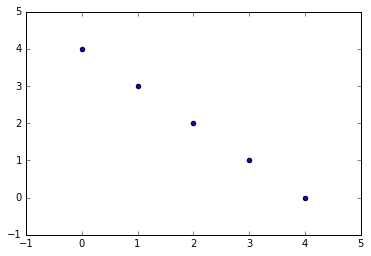

In [268]:
X = range(5)
print X

y = range(5)[::-1]
print y

plt.scatter(X, y)

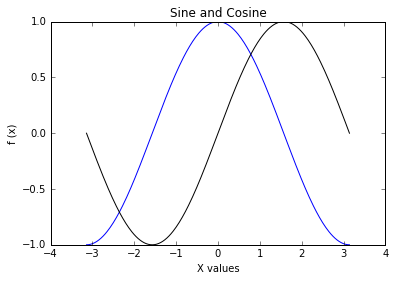

In [262]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C)
plt.plot(X, S, color = '#000000')

plt.title('Sine and Cosine')
plt.xlabel('X values')
plt.ylabel('f (x)')
# plt.show()

### 2. Scatterplot

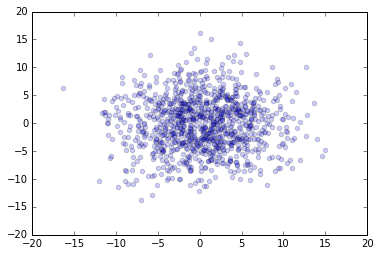

In [267]:
n = 1024
std = 5

X = np.random.normal(0,std,n)
Y = np.random.normal(0,std,n)

plt.scatter(X,Y, alpha = 0.2);

I feel like I'm not learning anything from this viz... Can we add some formatting to get more out of this scatterplot?

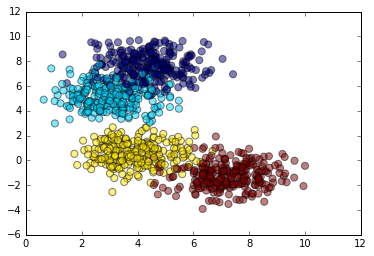

In [280]:
n = 1024

X, c = make_blobs(n_samples=n, n_features=2, centers = 4, cluster_std=1, random_state=935)
X1, X2 = np.hsplit(X, 2)

plt.scatter(X1, X2, s = 50, c = c, alpha = 0.5)
# plt.show()

### 3. Bar Plots

In [285]:
plt.bar?

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0.97471987  0.87813504  0.55029819  0.45458842  0.3578903   0.29326864
  0.36988444  0.34390855  0.33043447  0.13981987  0.14793789  0.05123007]
[ 0.26608358  0.35319891  0.31731196  0.16789129  0.17821841  0.21964796
  0.17803546  0.15722774  0.08429893  0.06380972  0.0402574   0.02232355]


([], <a list of 0 Text xticklabel objects>)

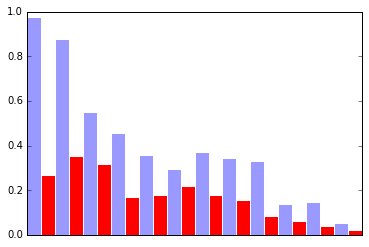

In [291]:
n = 12
X = np.arange(n)
Y1 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)
Y2 = (1-X/float(n)) * np.random.uniform(0.4,.2,n)

print X
print Y1
print Y2
plt.bar(X, Y1, width = 0.5, facecolor='#9999ff', edgecolor='white')
plt.bar(X +.5 , Y2, width = 0.5, facecolor='red', edgecolor='white')
plt.xticks([])
# plt.show()

## Matplotlib - Exercises

Given the graph below, how do we make it pink, with no borderline edges? Can we add a title and axes labels?

<Container object of 12 artists>

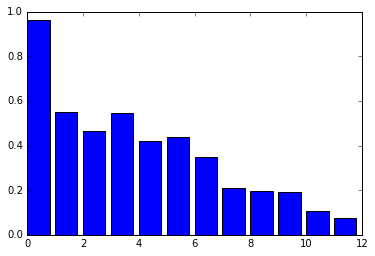

In [295]:
n = 12
X = np.arange(n)
Y2 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)

plt.bar(X, Y2)
# plt.show()

**CHALLENGE:** Supposed we have want to combine the two graphs above, and make the graph like that below, what should we do?

![](http://www.labri.fr/perso/nrougier/teaching/matplotlib/figures/bar_ex.png)

<Container object of 12 artists>

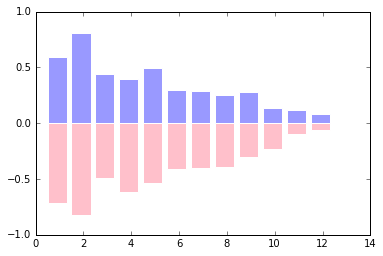

In [298]:
n = 12
X = np.arange(n)
Y1 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)
Y2 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)

## enter code to plot here
plt.bar(X+.5, Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X+.5, -Y2, facecolor='pink', edgecolor='white')

# plt.show()

### Quick Detour: Data Visualization WITHOUT Matplotlib

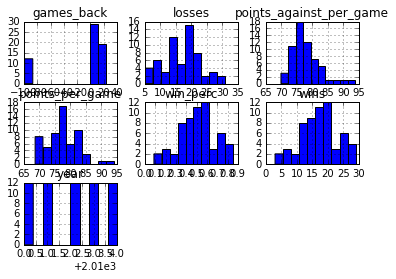

In [303]:
df9.hist();

# Model Building with Scikit-Learn

![hello](http://cacm.acm.org/system/assets/0001/3678/rp-overview.jpg)

###### Source: http://cacm.acm.org/blogs/blog-cacm/169199-data-science-workflow-overview-and-challenges/fulltext

**[R2D3's Visual Introduction to Machine Learning](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)**

### [Terminology](/home/chris/Documents/GA/intro_ml.pdf):
- Features / predictors / variables / X
- Outcome / predictions / Y
- Supervised vs. non supervised
- Classification / regression 
- Training dataset / testing dataset
- Overfitting

![](http://scikit-learn.org/stable/_static/ml_map.png)

Under/Overfitting, Visualized
![Overfitting, Visualized](https://shapeofdata.files.wordpress.com/2013/02/overfitting.png)

In [ ]:
from sklearn.datasets import make_blobs
from sklearn import datasets

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

### 1. Regression Model

In [304]:
x = np.linspace(-3, 3, 100)
y = x + np.random.normal(0,1,100)

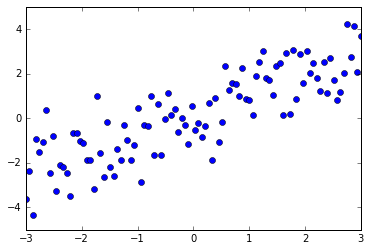

In [305]:
plt.plot(x, y, 'o')

One of the simplest models again is a regression, which fits a line to the scatterplot data.  This is called ordinary least squares linear regression.  The function in sklearn is LinearRegression.

In [306]:
## regressions can (and will) have multiple features, so a linear regression expects a vector for each observation
X = x.reshape(len(x), 1)
print x.shape
print X.shape

(100,)
(100, 1)


In [309]:
## Randomly split our dataset into a training split from which the algorithm \
## will learn and a test set on which we'll measure our accuracy.
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [310]:
# initiate an instance of the sklearn LinearRegression object and fit the training data
linreg = LinearRegression()
linreg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [313]:
linreg.coef_, linreg.intercept_

(array([ 0.85042711]), 0.13078743353177905)

In [319]:
yhat_train = linreg.predict(Xtrain)
#print zip(ytrain, yhat_train)

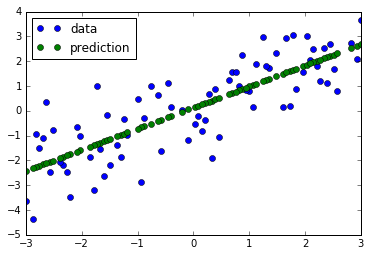

In [325]:
# plotting known x, y values
plt.plot(Xtrain, ytrain, 'o', label="data")

# plotting predicted y valuaes
plt.plot(Xtrain, yhat_train, 'o', label="prediction")

# plotting trendline
# Xspace = np.linspace(x.min(), x.max(), 256).reshape(256, 1)
# plt.plot(Xspace, linreg.predict(Xspace), color = 'r', linewidth = 2)

plt.legend(loc='best')

In [326]:
yhat_test = linreg.predict(Xtest)

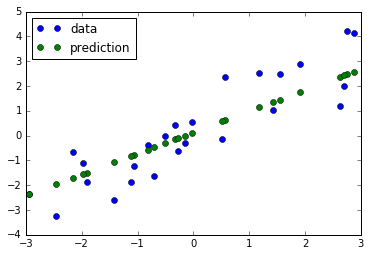

In [328]:
# plotting known x, y values
plt.plot(Xtest, ytest, 'o', label="data")

# plotting predicted y valuaes
plt.plot(Xtest, yhat_test, 'o', label="prediction")

# plotting trendline
# Xspace = np.linspace(x.min(), x.max(), 256).reshape(256, 1)
# plt.plot(Xspace, linreg.predict(Xspace), color = 'r', linewidth = 2)

plt.legend(loc='best')

To quantitatively evaluate the performance of the model, we use the R<sup>2</sup> or Mean Squared Error.

In [329]:
print 'Train', linreg.score(Xtrain, ytrain)
print 'Test', linreg.score(Xtest, ytest)

Train 0.658875511401
Test 0.767599906617


### 1. Regression Model - Exercise

Fit LinearRegression on the boston housing dataset.

In [330]:
boston = datasets.load_boston()

In [340]:
X = boston.get('data')
y =boston.get('target')

### Interactive Demo: Classification Model

In [343]:
iris = datasets.load_iris()

dfIris = pd.DataFrame(iris.data[:, :2], columns = iris.feature_names[:2])
dfIris['y'] = iris.get('target')

dfIris.head()

,sepal length (cm),sepal width (cm),y
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [347]:
# import some data to play with
iris = datasets.load_iris()

dfIris = pd.DataFrame(iris.data[:, :2], columns = iris.feature_names[:2])
dfIris['y'] = iris.get('target')

X = dfIris.iloc[:, :-1].values
y = dfIris.y.values
# print X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y)
# print X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [351]:
X.shape, X_train.shape, X_test.shape

((150, 2), (112, 2), (38, 2))

In [352]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

print clf.score(X_train, y_train)
print clf.score(X_test, y_test)

0.696428571429
0.631578947368


### Classification Model - Exercise

Re-run the classification model above, but this time use the entire iris dataset.